In [225]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [161]:
import pandas as pd

dataframe = pd.read_pickle('appartments.pkl')
number_of_rows = len(dataframe)

In [238]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.uniform(size = input_size+1, low = -0.5, high = 0.5)
        self.loss = list()
         
    def activation_function(self, x):
        return x

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # dot product of inputs and weights + bias
        return self.activation_function(summation)

    def train(self, training_inputs, values):
        for _ in range(self.epochs):
            predicted_values = list()
            for inputs, value in zip(training_inputs, values):
                prediction = self.predict(inputs)
                predicted_values.append(prediction)
                self.weights[1:] = self.weights[1:] + self.learning_rate * (value - prediction) * inputs
                self.weights[0] = self.weights[0] + self.learning_rate * (value - prediction)  # update bias
            # print(type(self.weights), type(value), type(self.learning_rate), type(prediction), type(inputs))
            error = mean_squared_error(values, predicted_values)
            self.loss.append(error)
            # print(self.weights)

In [258]:
trainingData = dataframe.iloc[:number_of_rows//2, [6, 7, 13, 17]].sample(frac=1).reset_index(drop=True)
actual_values = trainingData['price (k€)'].astype(float).values.reshape(-1, 1)
df_condition = pd.get_dummies(dataframe['condition']).astype(float)
trainingData = pd.concat([trainingData, df_condition], axis=1)
scaler = StandardScaler()
features = trainingData[['surface', 'rooms']].astype(float).values
features = scaler.fit_transform(features)
scaler = StandardScaler()
actual_values = scaler.fit_transform(actual_values)
actual_values = actual_values.flatten()
features

array([[-0.14887144,  0.03613093],
       [-0.42068074,  0.03613093],
       [ 1.21017509,  0.03613093],
       ...,
       [        nan,         nan],
       [        nan,         nan],
       [        nan,         nan]])

[-0.3589133  0.0350331  0.3555287]
[-0.00044876  0.34913967  0.13927496]


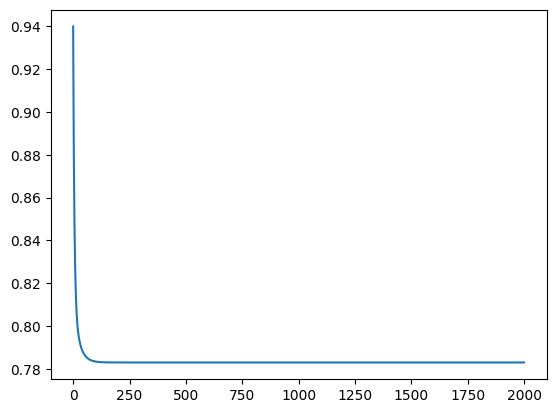

In [259]:
perceptron = Perceptron(input_size=features.shape[1], learning_rate=1e-4, epochs=2000)
print(perceptron.weights)
perceptron.train(training_inputs=features, values=actual_values)
print(perceptron.weights)
plt.plot(perceptron.loss)

In [269]:
predictions = perceptron.predict(features).reshape(-1, 1)
predictions =  scaler.inverse_transform(predictions).flatten()
print(predictions.shape)

actual_values = trainingData[['price (k€)']].values

(1995,)


In [270]:
for i in range(len(features)) :
    print(f"Input: {features[i]}, Predicted Output: {predictions[i]}")
    print(f"Actual value : {actual_values[i]}")

Input: [-0.14887144  0.03613093], Predicted Output: 1198.2925049377254
Actual value : [1400.]
Input: [-0.42068074  0.03613093], Predicted Output: 1174.4715209838375
Actual value : [1000.]
Input: [1.21017509 0.03613093], Predicted Output: 1317.3974247071646
Actual value : [1550.]
Input: [-0.2032333   0.03613093], Predicted Output: 1193.528308146948
Actual value : [1500.]
Input: [0.93836578 0.03613093], Predicted Output: 1293.576440753277
Actual value : [1100.]
Input: [-0.2032333   0.03613093], Predicted Output: 1193.528308146948
Actual value : [1150.]
Input: [0.66655648 1.64825879], Predicted Output: 1326.1151586689793
Actual value : [1600.]
Input: [-0.14887144  0.03613093], Predicted Output: 1198.2925049377254
Actual value : [700.]
Input: [3.65645883 1.64825879], Predicted Output: 1588.145982161746
Actual value : [1600.]
Input: [-0.90993749 -1.57599693], Predicted Output: 1075.234047997249
Actual value : [1500.]
Input: [0.93836578 1.64825879], Predicted Output: 1349.9361426228672
Actua

In [ ]:
dataframe['rooms'] = dataframe['rooms'].astype(int)
dataframe['floor'] = dataframe['floor'].astype(int)
dataframe['condition'].value_counts()
dataframe

In [ ]:
pd.get_dummies(dataframe['condition']).astype(int)